In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph, analysis
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer

/Users/Brett/Dropbox/Code/bricolage-dev


In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import numpy as np
import bisect
from IPython.display import Image

In [4]:
def show_network(n, s=True):
    graph.save_network_as_fullgraph(n, name='test', simplify=s)
    return Image(filename='network-test.png', height=500) 

In [5]:
treat = lineage.Treatment("/Users/Brett/Desktop/simple/10-(a-and-not-b)-or-(a-and-not-c)-or-(not-b-and-not-c)/")

In [6]:
rep = treat.replicates[15]
lin = rep.get_lineage(readonly=True)
targ = lin.targets[0]

In [7]:
pf, pm, pc = analysis.make_population_frames(lin.population, targ, [0, 1, 1])
pc.describe()

,C1,C2,C3,C4,C5,C6,C7,C8
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001578,1.672256e-03,0.006497,0.000430,1.706562,0.001134,2.487360,0.443400
std,0.017499,2.168796e-02,0.045139,0.007989,0.413391,0.030338,0.415437,0.185582
min,0.000000,-1.051124e-16,0.000000,0.000000,0.435534,0.000000,0.624256,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,1.124256,0.000000,2.097590,0.235606
50%,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,2.548795,0.438426
75%,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,3.000000,0.641245
max,0.423969,2.935644e-01,0.468397,0.227399,2.308192,0.954667,3.000000,1.256464


In [8]:
pc.query('C7 == 3.0').head()

,C1,C2,C3,C4,C5,C6,C7,C8
1,0,0,0,0,2,0,3,0.235606
5,0,0,0,0,2,0,3,0.235606
6,0,0,0,0,2,0,3,0.235606
12,0,0,0,0,2,0,3,0.235606
13,0,0,0,0,2,0,3,0.235606


1.0
saving test


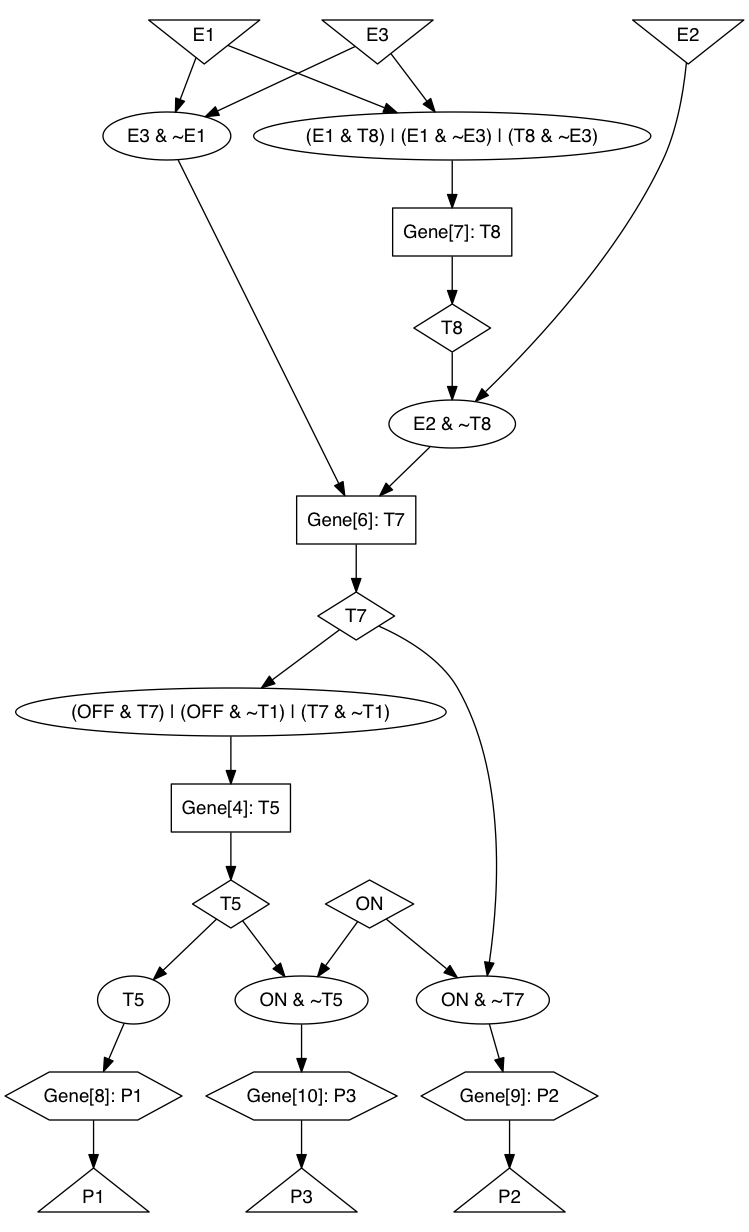

In [9]:
net = lin.population[1]
print net.fitness
show_network(net)

In [10]:
anc = lin.get_ancestry(net.identifier)
ff, mf, cf = analysis.make_ancestry_frames(anc, targ, [0, 1, 1])

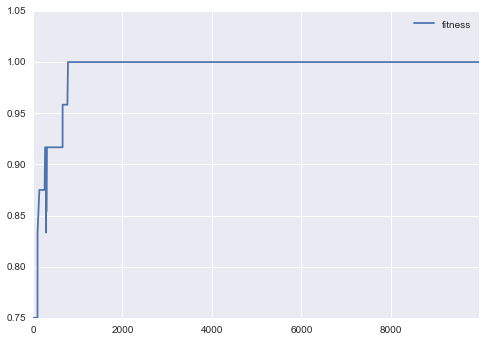

In [11]:
ff.plot()

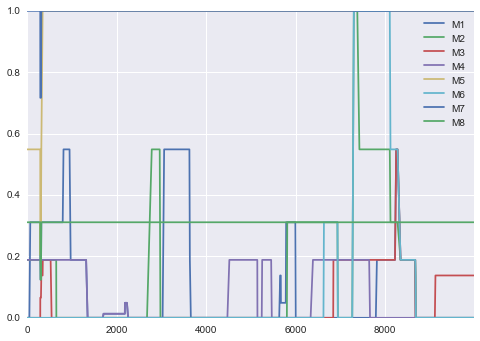

In [12]:
mf.plot()

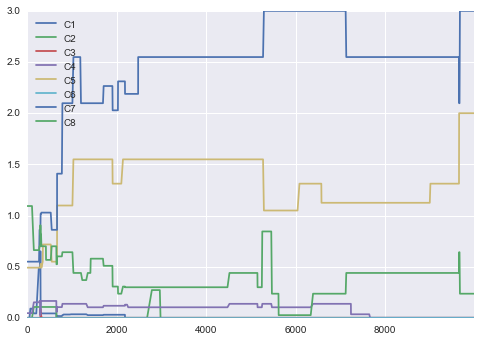

In [13]:
cf.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d23b450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10d575490>], dtype=object)

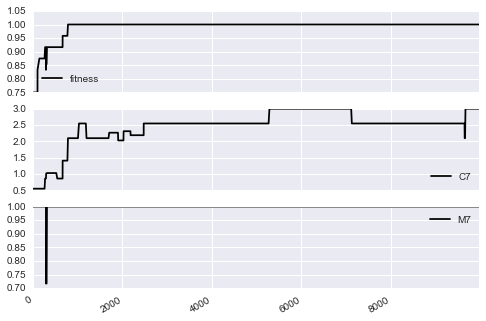

In [ ]:
q = pd.concat([ff, cf, mf], axis=1)
q.plot(y=['fitness', 'C7', 'M7'], subplots=True)

In [1]:
show_network(anc[-1]))

SyntaxError: invalid syntax (<ipython-input-1-44dcb4c4ef09>, line 1)

saving test


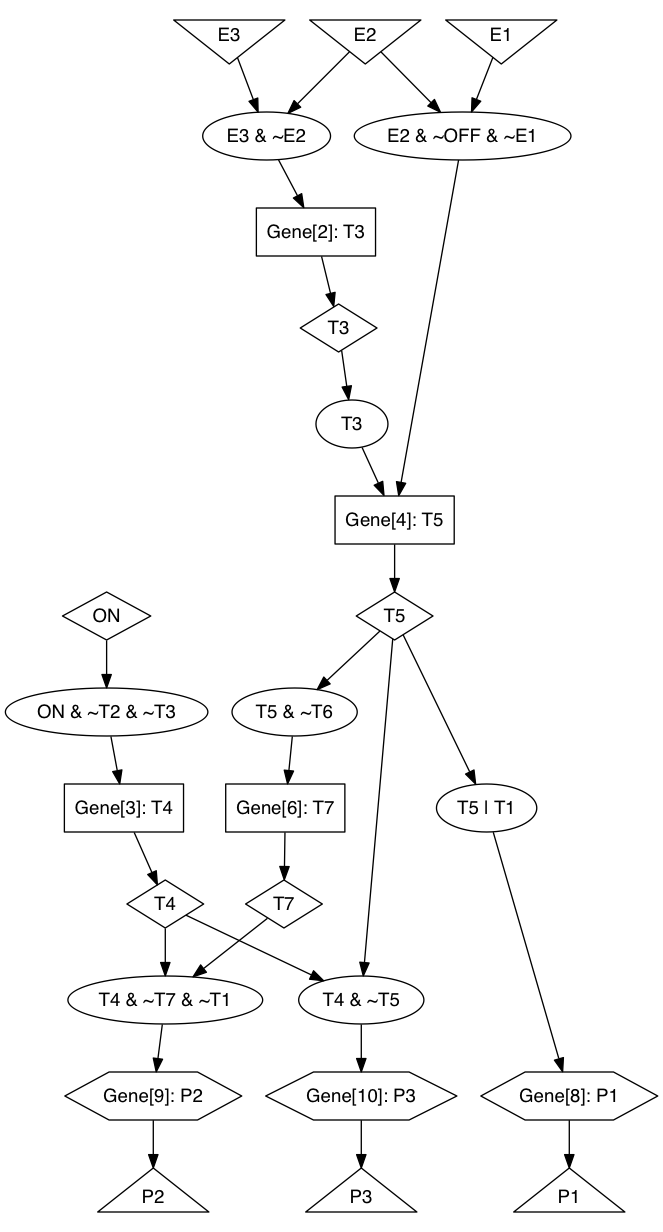

In [26]:
show_network(anc.network_at_generation(1460))

saving test


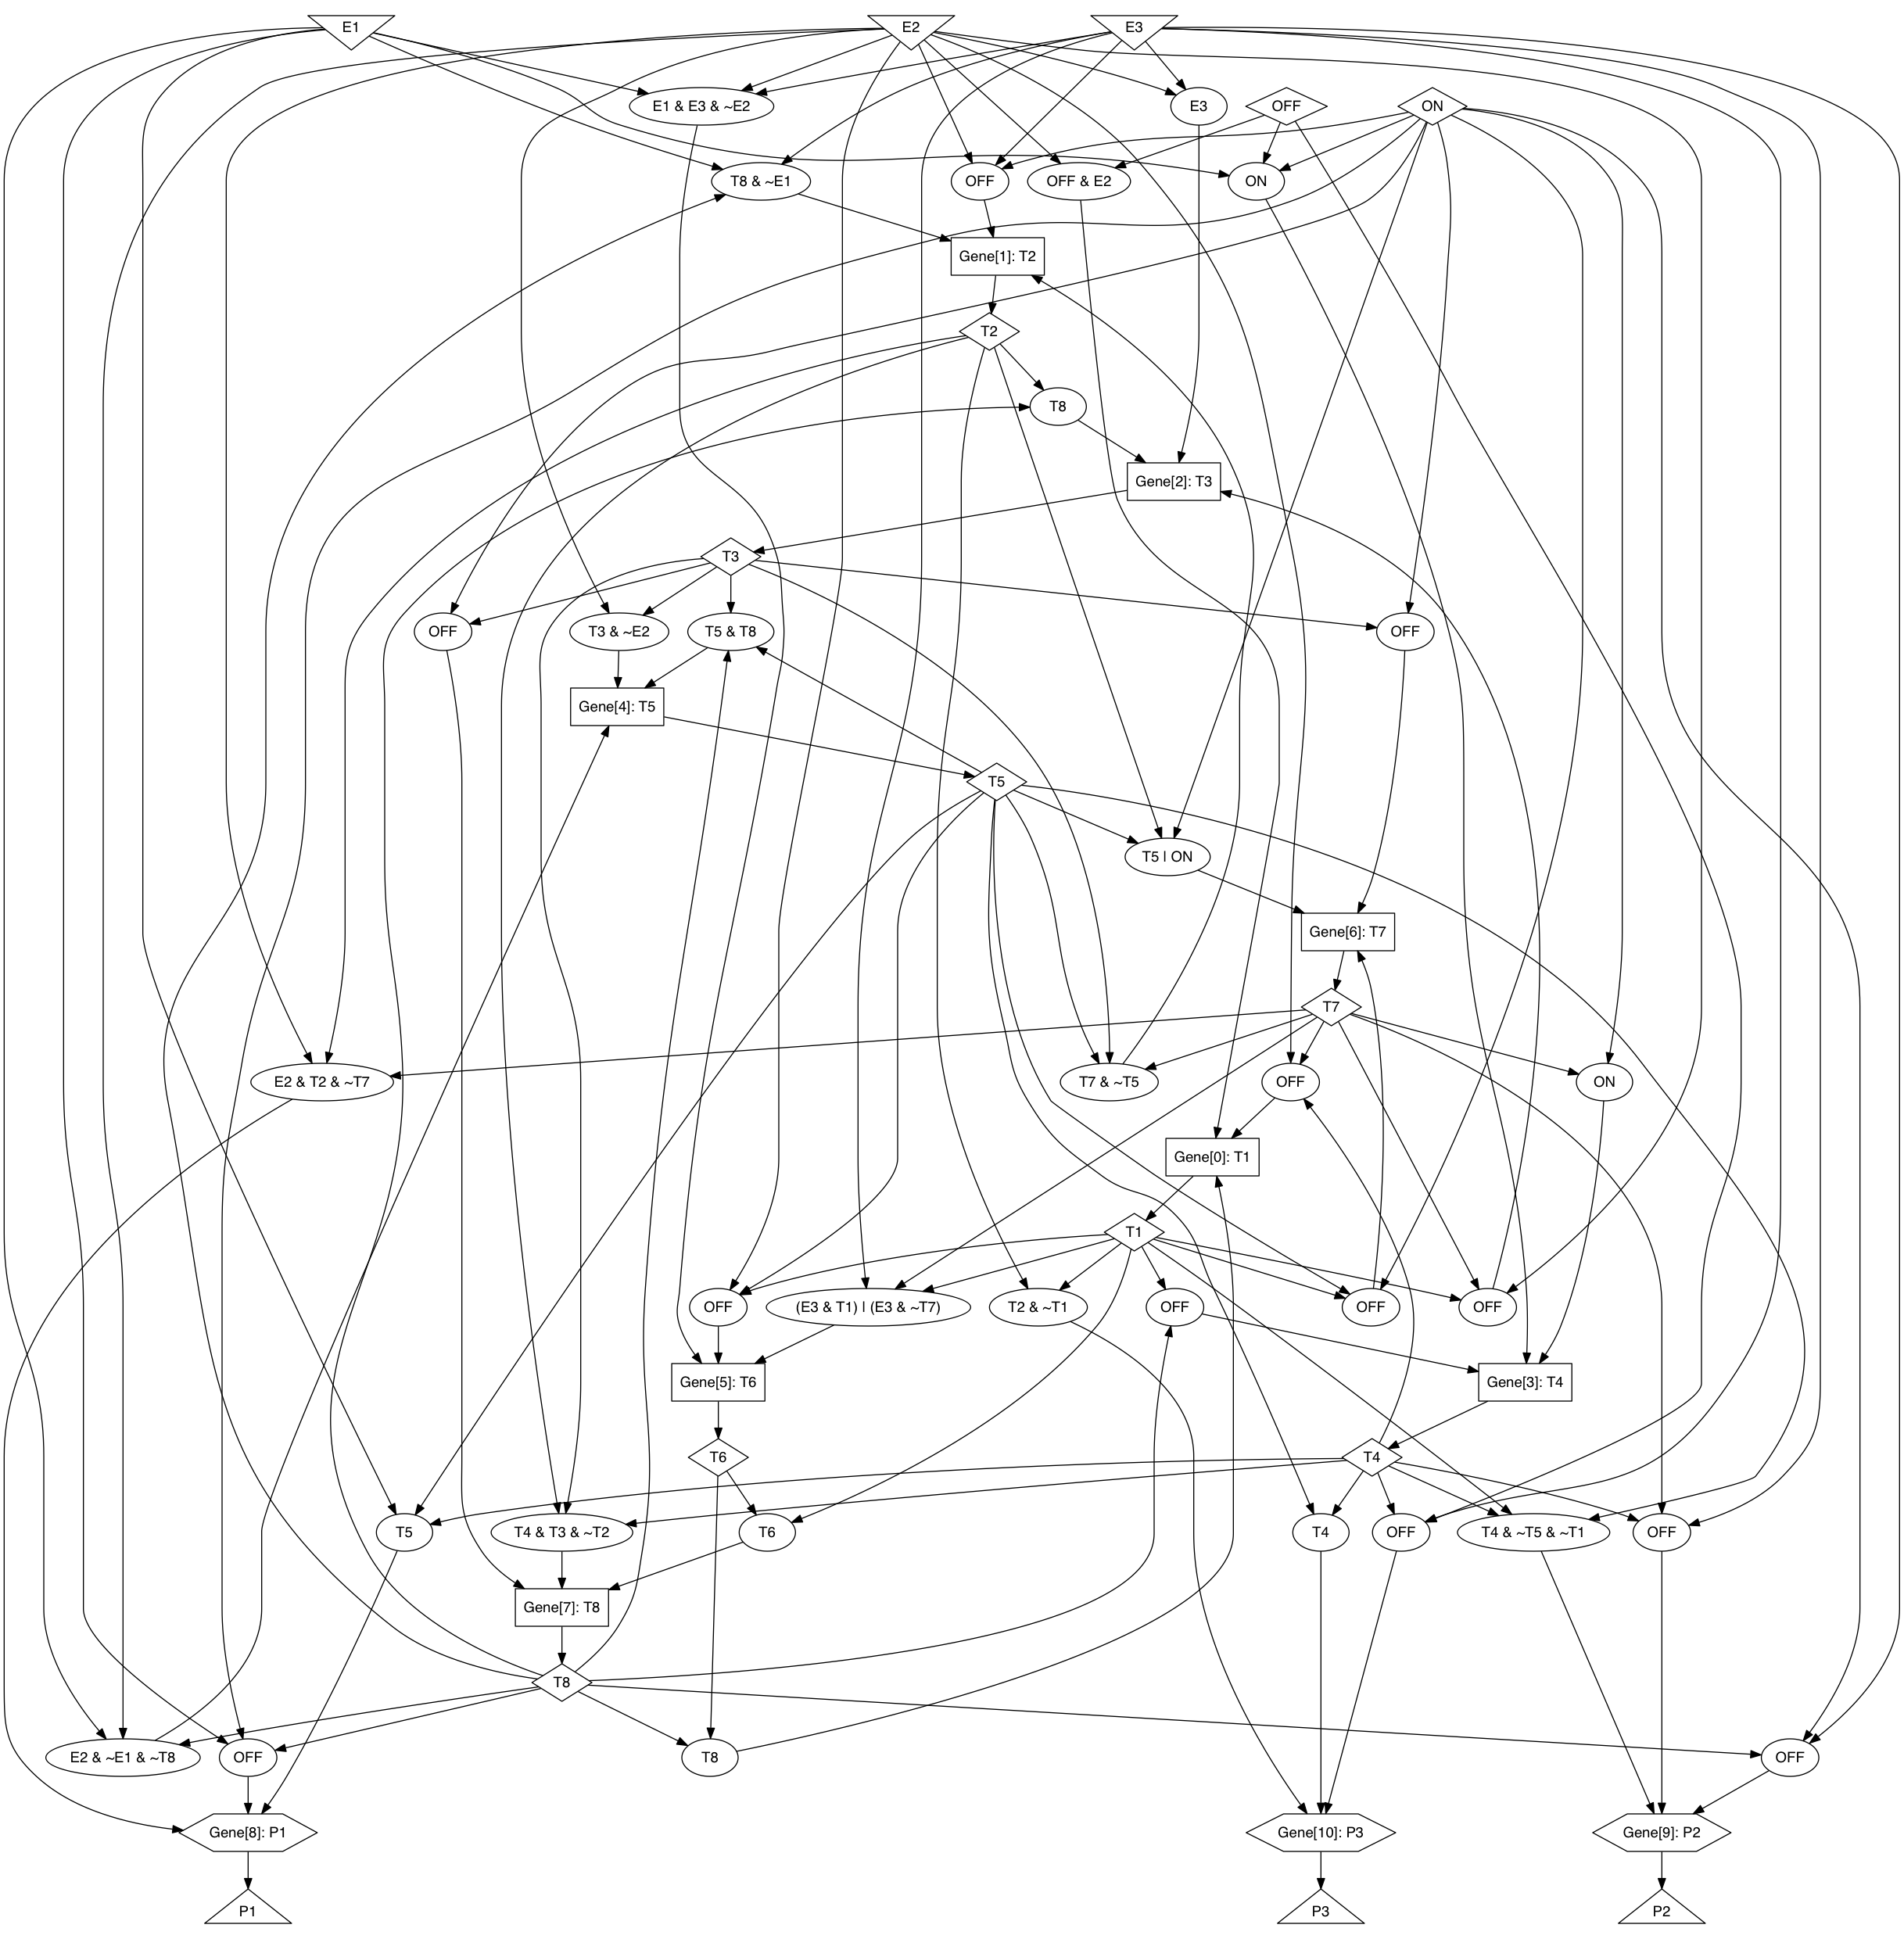

In [29]:
show_network(anc.network_at_generation(8000), s=False)